In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from typing import List

***Visalization and spliting***

In [151]:
df = pd.read_csv("data/melb_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [152]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [153]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


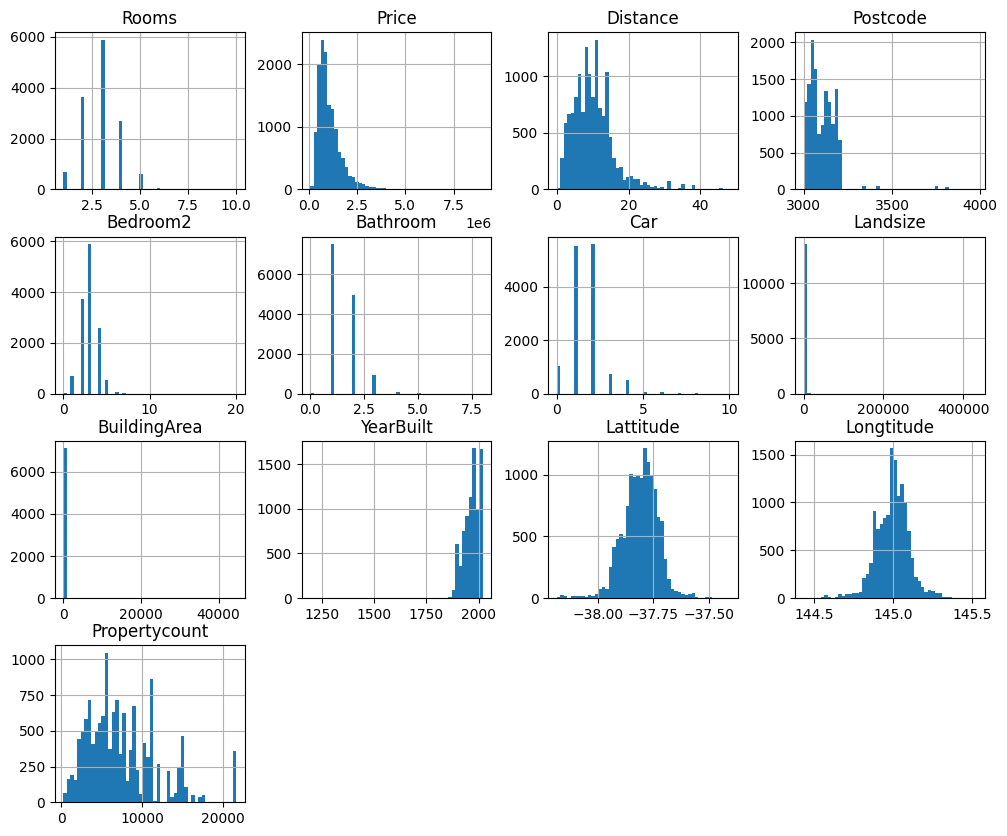

In [154]:
df.hist(bins=50, figsize=(12,10))
plt.show()

In [155]:
## splitting data for train and test
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

***Working on the train set***

In [156]:
data_train = train_set.copy()

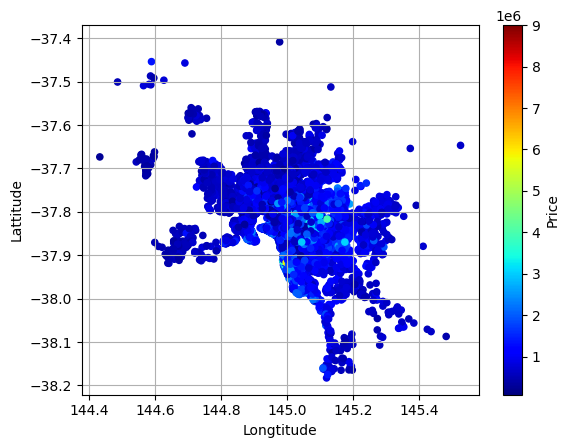

In [157]:
## geographical visualization
data_train.plot(kind = "scatter", x="Longtitude", y="Lattitude", grid=True, c="Price", cmap="jet", colorbar=True)
plt.show()

In [158]:
## missing values
print("-"*35)
print("Missing values in columns")
print("-"*35)
print(data_train.isna().sum())
print("-"*35)
print("Sum of missing values:",data_train.isna().sum().sum())

-----------------------------------
Missing values in columns
-----------------------------------
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                50
Landsize            0
BuildingArea     5129
YearBuilt        4286
CouncilArea      1090
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
-----------------------------------
Sum of missing values: 10555


Here we decided to drop BuildingArea, YearBuilt and CouncilArea variables because of the number of missing values. Also Address, Postcode, SellerG will be dropped, because they seem to be useless. Suburb will also be dropped because later we'll use ClusterSimilarities using longtitude and lattitude. Missing values in Car will be imputed.

In [159]:
data_train = data_train.drop(columns= ["Address", "Postcode", "CouncilArea", "YearBuilt", "Date", "SellerG", "Suburb", "BuildingArea", "Method", "Regionname"])

In [160]:
data_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
12796,4,h,1480000.0,14.2,4.0,2.0,2.0,695.0,-37.86127,145.14271,13366.0
9642,3,h,1530000.0,14.2,3.0,1.0,2.0,810.0,-37.86838,145.14664,13366.0
3207,2,u,690000.0,4.6,2.0,1.0,1.0,82.0,-37.81800,145.02680,11308.0
1698,2,u,570000.0,3.2,2.0,1.0,1.0,0.0,-37.79020,144.97000,3106.0
761,4,h,1041000.0,13.0,4.0,2.0,1.0,292.0,-37.91480,145.02430,6795.0


In [161]:
## correlation
data_corr = data_train.drop(['Type'], axis=1)
corr_matrix = data_corr.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.494437
Bedroom2         0.471534
Bathroom         0.462688
Car              0.228984
Longtitude       0.203065
Landsize         0.047619
Propertycount   -0.045626
Distance        -0.162155
Lattitude       -0.209831
Name: Price, dtype: float64

<Axes: >

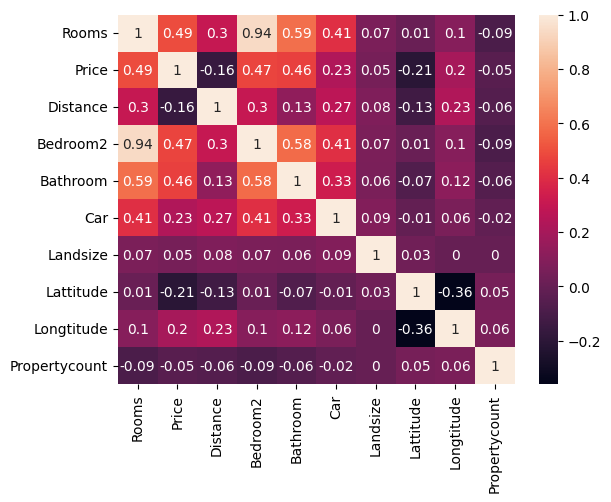

In [189]:
%matplotlib inline
corr_matrix = round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=corr_matrix)

As we can see Landsize and property count may be irrelevant as they have low correlation

In [224]:
## outliers
def get_nr_of_outliers(col_names: List[str], dataframe: pd.DataFrame) -> None:
    for col in col_names:
        q1 = np.percentile(dataframe[col], 25)
        q3 = np.percentile(dataframe[col], 75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = [x for x in dataframe[col] if x < lower_bound or x > upper_bound]
        num_outliers = len(outliers)
        print(f"Number of outliers for {col}: {num_outliers}")

In [227]:
get_nr_of_outliers(["Rooms", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "Propertycount"], data_train)

Number of outliers for Rooms: 555
Number of outliers for Distance: 335
Number of outliers for Bedroom2: 536
Number of outliers for Bathroom: 114
Number of outliers for Car: 0
Number of outliers for Landsize: 304
Number of outliers for Propertycount: 288


We have couple of outliers which can affect our ML algorithms and as we have really small dataset, we will use log function on those

In [167]:
housing = train_set.drop("Price", axis=1)
housing_labels = train_set["Price"].copy()

In [166]:
## ClusterSimilarity

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None) -> None:
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [173]:
cluster_simil = ClusterSimilarity(n_clusters=3, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["Lattitude", "Longtitude"]],
                                           sample_weight=housing_labels)

/home/daniel/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


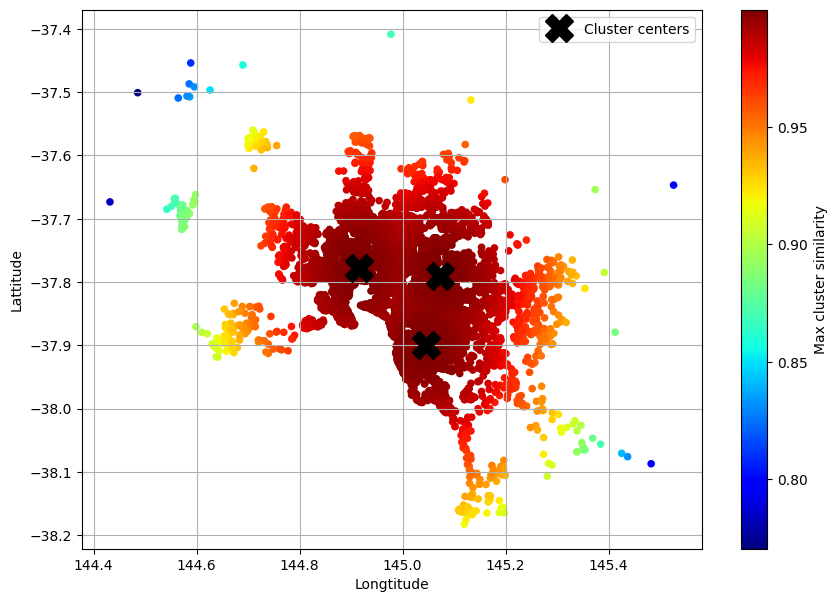

In [174]:
housing["Max cluster similarity"] = similarities.max(axis=1)
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans.cluster_centers_[:, 1],
         cluster_simil.kmeans.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

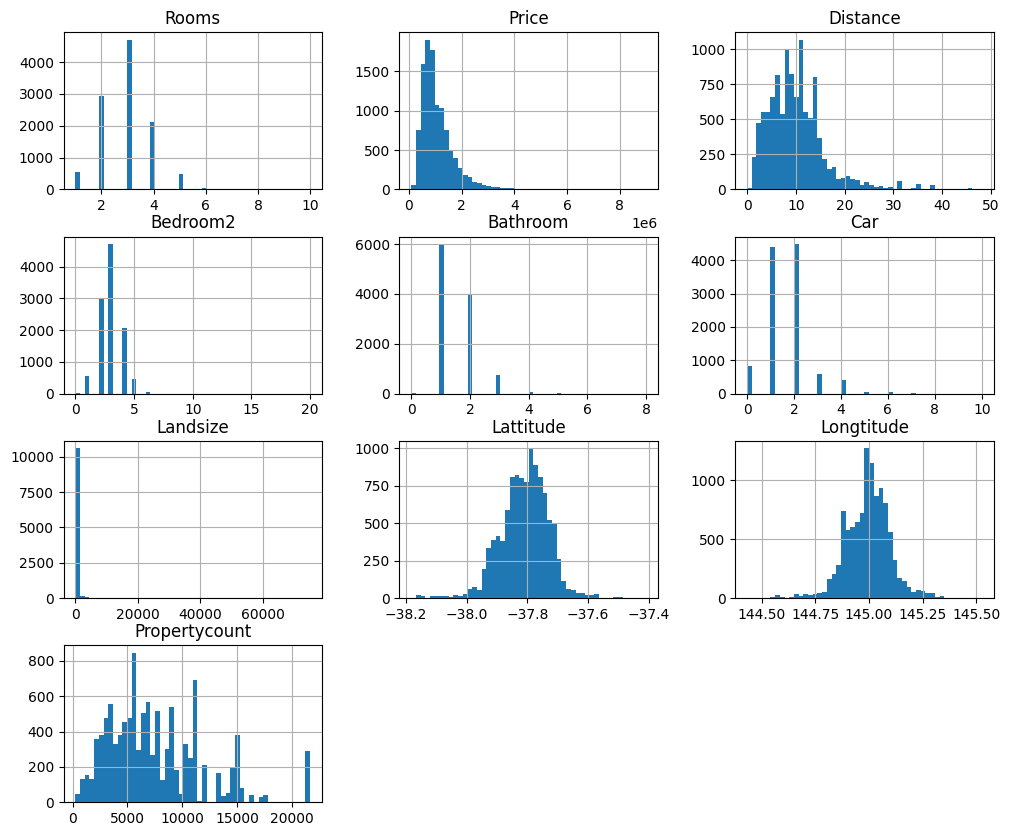

In [175]:
data_train.hist(bins=50, figsize=(12,10))
plt.show()

Taking a look at a histograms once again and we can log Price to get better results

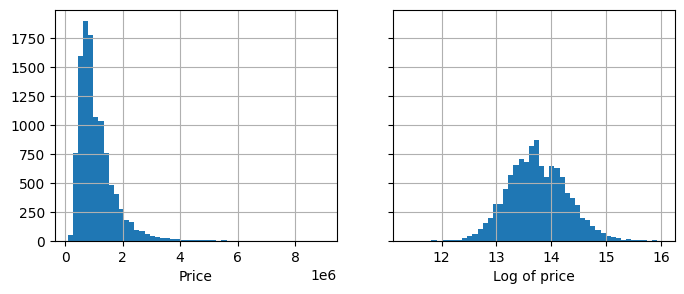

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data_train["Price"].hist(ax=axs[0], bins=50)
data_train["Price"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Price")
axs[1].set_xlabel("Log of price")
plt.show()

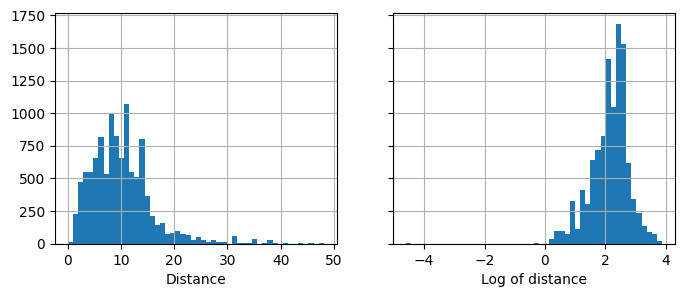

In [185]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
distance = data_train["Distance"] + 0.01
distance.hist(ax=axs[0], bins=50)
distance.apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Distance")
axs[1].set_xlabel("Log of distance")
plt.show()

As we can see here - with distance it's not worth it to log it as we need to move it a bit to avoid log(0) and it's far from being perfect

To sum up:<br/> 1. We need to drop unused columns from both sets <br/> 2. Inpute missing values in car using mean/median <br/> 3. Create a log of Price and predict log prices <br/> 4. Use ClusterSimilarity to add some points - maybe it'll give better results than longtitude and lattitude. <br/> 5. Use MinMaxScaler to scale variables between -1 and 1 <br/> 6. Dummy variables for categorical ones <br/> 7. Take care about outliers

***Pipelines***

In [197]:
train_set = train_set.drop(columns= ["Address", "Postcode", "CouncilArea", "YearBuilt", "Date", "SellerG", "Suburb", "BuildingArea", "Method", "Regionname"])
test_set = test_set.drop(columns= ["Address", "Postcode", "CouncilArea", "YearBuilt", "Date", "SellerG", "Suburb", "BuildingArea", "Method", "Regionname"])

We previously decided not to use those columns so we're dropping them

In [198]:
housing = train_set.drop("Price", axis=1)
housing_labels = train_set["Price"].copy()
housing

,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
12796,4,h,14.2,4.0,2.0,2.0,695.0,-37.86127,145.14271,13366.0
9642,3,h,14.2,3.0,1.0,2.0,810.0,-37.86838,145.14664,13366.0
3207,2,u,4.6,2.0,1.0,1.0,82.0,-37.81800,145.02680,11308.0
1698,2,u,3.2,2.0,1.0,1.0,0.0,-37.79020,144.97000,3106.0
761,4,h,13.0,4.0,2.0,1.0,292.0,-37.91480,145.02430,6795.0
...,...,...,...,...,...,...,...,...,...,...
5191,3,h,11.2,3.0,1.0,1.0,0.0,-37.72170,144.99540,21650.0
13418,2,h,3.6,2.0,1.0,1.0,164.0,-37.77796,144.98374,6244.0
5390,3,t,2.6,3.0,1.0,1.0,383.0,-37.82480,144.99760,14949.0
860,2,h,13.9,2.0,2.0,1.0,201.0,-37.92930,145.06570,10969.0


In [244]:
## preparing two preprocessing methods
cluster_simil = ClusterSimilarity(n_clusters=3, gamma=1., random_state=42)
impute_scale_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
cat_pipeline = OneHotEncoder(handle_unknown="ignore")
log_pipeline = make_pipeline(
    FunctionTransformer(lambda x: x+0.001, feature_names_out="one-to-one"), ## we add small value to avoid log(0) problem
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

preprocessing_standardized = ColumnTransformer([
        ("geo", cluster_simil, ["Lattitude", "Longtitude"]),
        ("imputed", impute_scale_pipeline, ["Car"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ("log", log_pipeline, ["Rooms", "Distance", "Bedroom2", "Bathroom", "Landsize", "Propertycount"])
    ])

preprocessing_standardized_without_log = ColumnTransformer([
        ("geo", cluster_simil, ["Lattitude", "Longtitude"]),
        ("imputed", impute_scale_pipeline, ["Car"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=StandardScaler())

In [245]:
housing_prepared = preprocessing_standardized.fit_transform(housing)
preprocessing_standardized.get_feature_names_out()

/home/daniel/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array(['geo__Cluster 0 similarity', 'geo__Cluster 1 similarity',
       'geo__Cluster 2 similarity', 'imputed__Car', 'cat__Type_h',
       'cat__Type_t', 'cat__Type_u', 'log__Rooms', 'log__Distance',
       'log__Bedroom2', 'log__Bathroom', 'log__Landsize',
       'log__Propertycount'], dtype=object)

In [246]:
housing_prepared_without_log = preprocessing_standardized_without_log.fit_transform(housing)
preprocessing_standardized_without_log.get_feature_names_out()

/home/daniel/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array(['geo__Cluster 0 similarity', 'geo__Cluster 1 similarity',
       'geo__Cluster 2 similarity', 'imputed__Car', 'cat__Type_h',
       'cat__Type_t', 'cat__Type_u', 'remainder__Rooms',
       'remainder__Distance', 'remainder__Bedroom2',
       'remainder__Bathroom', 'remainder__Landsize',
       'remainder__Propertycount'], dtype=object)

***Models***